# Model Analysis

## Initial Setups

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from book import BookModel, joblib

import warnings
warnings.filterwarnings('ignore')

### Function declarations

In [2]:
def printDFDimensions(item: str, df : pd.DataFrame):
    print(f'{item} dimensions:')
    print(f'Row size: {df.shape[0]}')
    print(f'Column size: {df.shape[1]}')

### Upload dataset

In [3]:
df_book = pd.read_csv('book/Books.csv')

df_rating = pd.read_csv('book/Ratings.csv', dtype={ 
    'User-ID': 'object',
    'ISBN': 'object' 
})

## Book Data Preprocessing

### Books dataset preview

In [4]:
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Original dimensions

In [5]:
printDFDimensions('Books', df_book)

Books dimensions:
Row size: 271360
Column size: 8


### Remove rows with missing value

In [6]:
# Checks rows with missing value
df_book.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
# Remove rows with missing value
df_book.dropna(inplace=True)

In [8]:
df_book.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

### New dimensions (after removing missing value)

In [9]:
printDFDimensions('Books', df_book)

Books dimensions:
Row size: 271353
Column size: 8


## Rating Data Preprocessing

### Ratings dataset preview

In [10]:
df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Original dimensions

In [11]:
printDFDimensions("Ratings", df_rating)

Ratings dimensions:
Row size: 1149780
Column size: 3


### Remove rows with missing value

In [12]:
df_rating.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## Exploratory Data Analysis

In [13]:
df_rating['User-ID'].value_counts()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

### Data plots

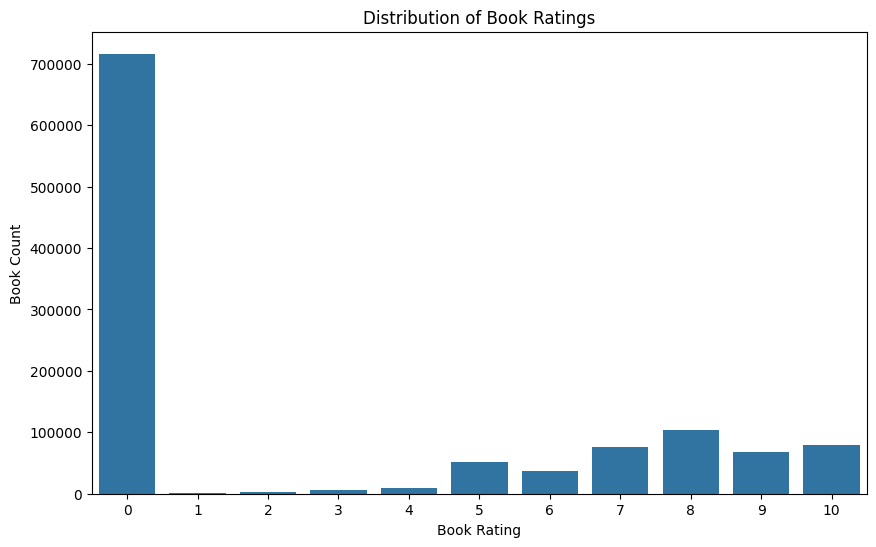

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=df_rating)
plt.title('Distribution of Book Ratings')
plt.xlabel('Book Rating')
plt.ylabel('Book Count')
plt.show()

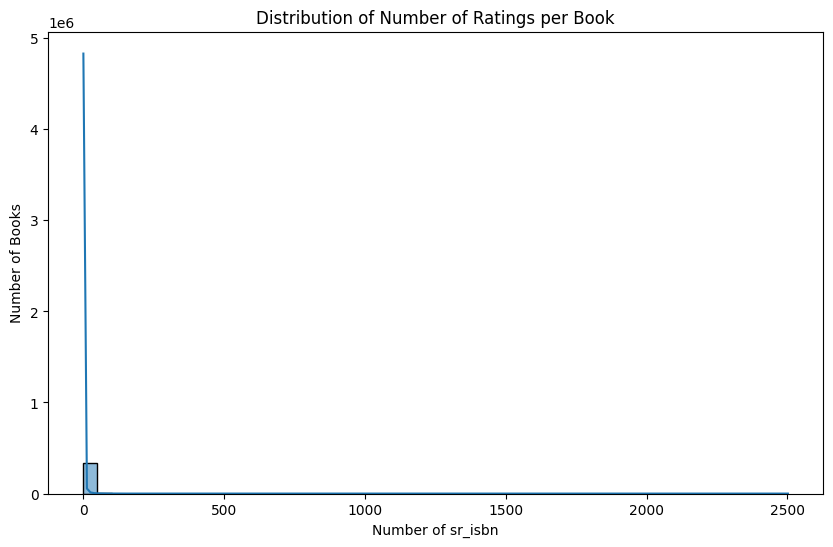

In [15]:
num_ratings_per_book = df_rating['ISBN'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(num_ratings_per_book, bins=50, kde=True)
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of sr_isbn')
plt.ylabel('Number of Books')
plt.show()

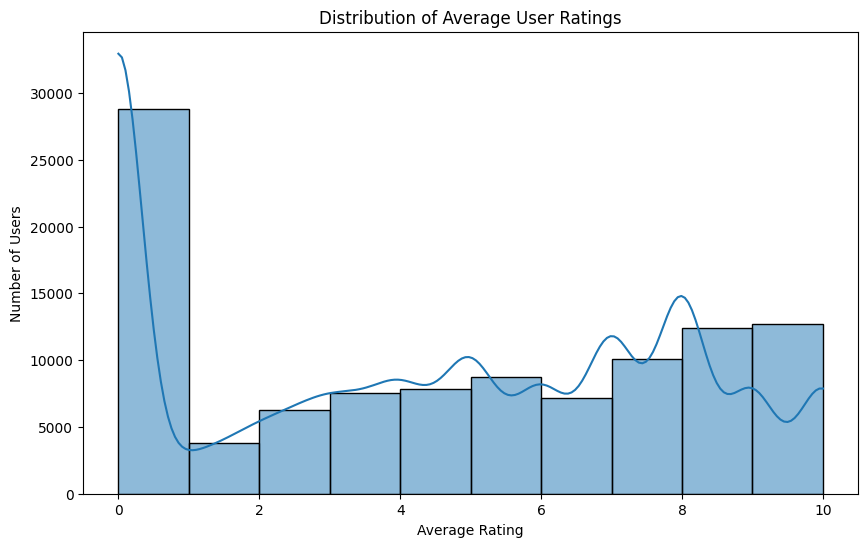

In [16]:
user_ratings_dist = df_rating.groupby('User-ID')['Book-Rating'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_dist, bins=10, kde=True)
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

In [17]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  object
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 26.3+ MB


In [18]:
df_rating.describe()

,Book-Rating
count,1.149780e+06
mean,2.866950e+00
std,3.854184e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,7.000000e+00
max,1.000000e+01


## Preprocessing for Machine Learning

### Filter users with less than 200 ratings

In [19]:
sr_user_id = df_rating['User-ID'].value_counts()
sr_user_id

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [20]:
unfiltered_users = sr_user_id[sr_user_id >= 200].index
print(f'Users with more than 200 ratings: {len(unfiltered_users)} users')
print(f'Ratings more than 200 per User: {df_rating['User-ID'].isin(unfiltered_users).sum()} ratings')

Users with more than 200 ratings: 905 users
Ratings more than 200 per User: 527556 ratings


In [21]:
df_rating_rm = df_rating[df_rating['User-ID'].isin(unfiltered_users)]
printDFDimensions('Filtered Ratings', df_rating_rm)

Filtered Ratings dimensions:
Row size: 527556
Column size: 3


### Filter books with less than 100 ratings

In [22]:
sr_isbn = df_rating['ISBN'].value_counts() 
sr_isbn

ISBN
0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: count, Length: 340556, dtype: int64

In [23]:
unfiltered_isbn = sr_isbn[sr_isbn >= 100].index
print(f'Books with more than 100 ratings: {len(unfiltered_isbn)} books')
print(f'Ratings of books with more than 100 ratings: {df_rating_rm['ISBN'].isin(unfiltered_isbn).sum()} ratings')

Books with more than 100 ratings: 731 books
Ratings of books with more than 100 ratings: 49781 ratings


In [24]:
df_rating_rm = df_rating_rm[df_rating_rm['ISBN'].isin(unfiltered_isbn)]
printDFDimensions('Filtered Ratings', df_rating_rm)

Filtered Ratings dimensions:
Row size: 49781
Column size: 3


### Filter books with same title and author

In [25]:
df_book.drop_duplicates(subset=['Book-Title', 'Book-Author'], inplace=True)
printDFDimensions("Filtered Books", df_book)

Filtered Books dimensions:
Row size: 251178
Column size: 8


In [26]:
df_rating_rm = df_rating_rm[df_rating_rm['ISBN'].isin(df_book['ISBN'])]
printDFDimensions("Filtered Ratings", df_rating_rm)

Filtered Ratings dimensions:
Row size: 41624
Column size: 3


### Export Filtered Books and Ratings

In [27]:
df_book.to_csv('book/filtered/Books.csv', index=False)
df_rating_rm.to_csv('book/filtered/Ratings.csv', index=False)

In [28]:
df_rating_rm.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1469,277427,0060930535,0
1471,277427,0060934417,0
1474,277427,0061009059,9
1484,277427,0140067477,0


In [29]:
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Further preprocessing

In [30]:
df_preprocessed = df_rating_rm.pivot_table(index=['User-ID'],columns=['ISBN'],values='Book-Rating').fillna(0).T
df_preprocessed

User-ID,100459,100644,100846,100906,101209,101305,101851,101876,102275,102359,...,95991,96054,96448,97874,98297,98391,9856,98741,98758,99955
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060175400,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573227331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_preprocessed = df_preprocessed.sort_index()
df_preprocessed.head()

User-ID,100459,100644,100846,100906,101209,101305,101851,101876,102275,102359,...,95991,96054,96448,97874,98297,98391,9856,98741,98758,99955
ISBN,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060175400,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_preprocessed.loc["002542730X"][:5]

User-ID
100459    0.0
100644    0.0
100846    0.0
100906    0.0
101209    0.0
Name: 002542730X, dtype: float64

In [33]:
df_preprocessed.to_csv('preprocessed.csv', index=True)

### Create KNN Model

In [34]:
    
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [35]:
model = NearestNeighbors(metric='cosine')
model.fit(df_preprocessed.values)

NearestNeighbors(metric='cosine')

### Check Prediction

In [36]:
title = "I'll Be Seeing You"
isbns = df_book.loc[df_book['Book-Title'] == title, 'ISBN'].values
if len(isbns) != 0:
    df_isbn = df_preprocessed.loc[isbns[0]].values.reshape(1, -1)
    distance, indice = model.kneighbors(df_isbn, n_neighbors=6)

    print(distance)
    print(indice)
else: 
    print(f"The book '{title}' does not exist in the dataset.")

[[2.22044605e-16 4.88018643e-01 5.41625389e-01 6.00052629e-01
  6.19519836e-01 6.45120428e-01]]
[[519 487 506 489 512 370]]


In [37]:
if len(isbns) != 0:
    isbns = df_preprocessed.iloc[indice[0]].index.values
    pd.DataFrame({
        'title'   : df_book.loc[df_book['ISBN'].isin(isbns), 'Book-Title'].values,
        'distance': distance[0]
    }).sort_values(by='distance', ascending=False)

In [38]:
book_model = BookModel(
    'book/filtered/Books.csv',
    'preprocessed.csv',
    'model.joblib'
)
recommendations = book_model.getRecommendations("I'll Be Seeing You")[1]
print(recommendations)

['0671888587' '0553567187']


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
print(f'Title: {recommendations[0]['title']}, Distance: {recommendations[0]['distance']}')

Title: You Belong To Me, Distance: 0.48801864348760604


## Save model

In [ ]:
joblib.dump(model, 'model.joblib')

['model.joblib']

## Load model

### Book model declaration

In [ ]:
book_model = BookModel(
    'book/filtered/Books.csv',
    'preprocessed.csv',
    'model.joblib'
)

### Autocomplete method

In [ ]:
title = "I'll Be Seeing You"

book_model.getAutocompletes("sabe")

[]

### Recommendation method

In [ ]:
recommendations = book_model.getRecommendations(title)[1]

if len(recommendations) != 0:
    print(f"Recommendations for '{title}':")
    for book in recommendations:
        print(f"{book['title']} (similarity score: {1 - book['distance']:.2f})")

Recommendations for 'I'll Be Seeing You':
You Belong To Me (similarity score: 0.51)
Let Me Call You Sweetheart (similarity score: 0.46)
Before I Say Good-Bye (similarity score: 0.40)
Loves Music, Loves to Dance (similarity score: 0.38)
The Third Twin (similarity score: 0.35)
